# **Box-Cox transformation: preprocessing.PowerTransformer(method='box-cox')**
* sklearn help: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
* concept: https://blog.minitab.com/blog/applying-statistics-in-quality-projects/how-could-you-benefit-from-a-box-cox-transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


# **Boston House Prices**
https://www.kaggle.com/vikrishnan/boston-house-prices

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per \$10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in $1000's


In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


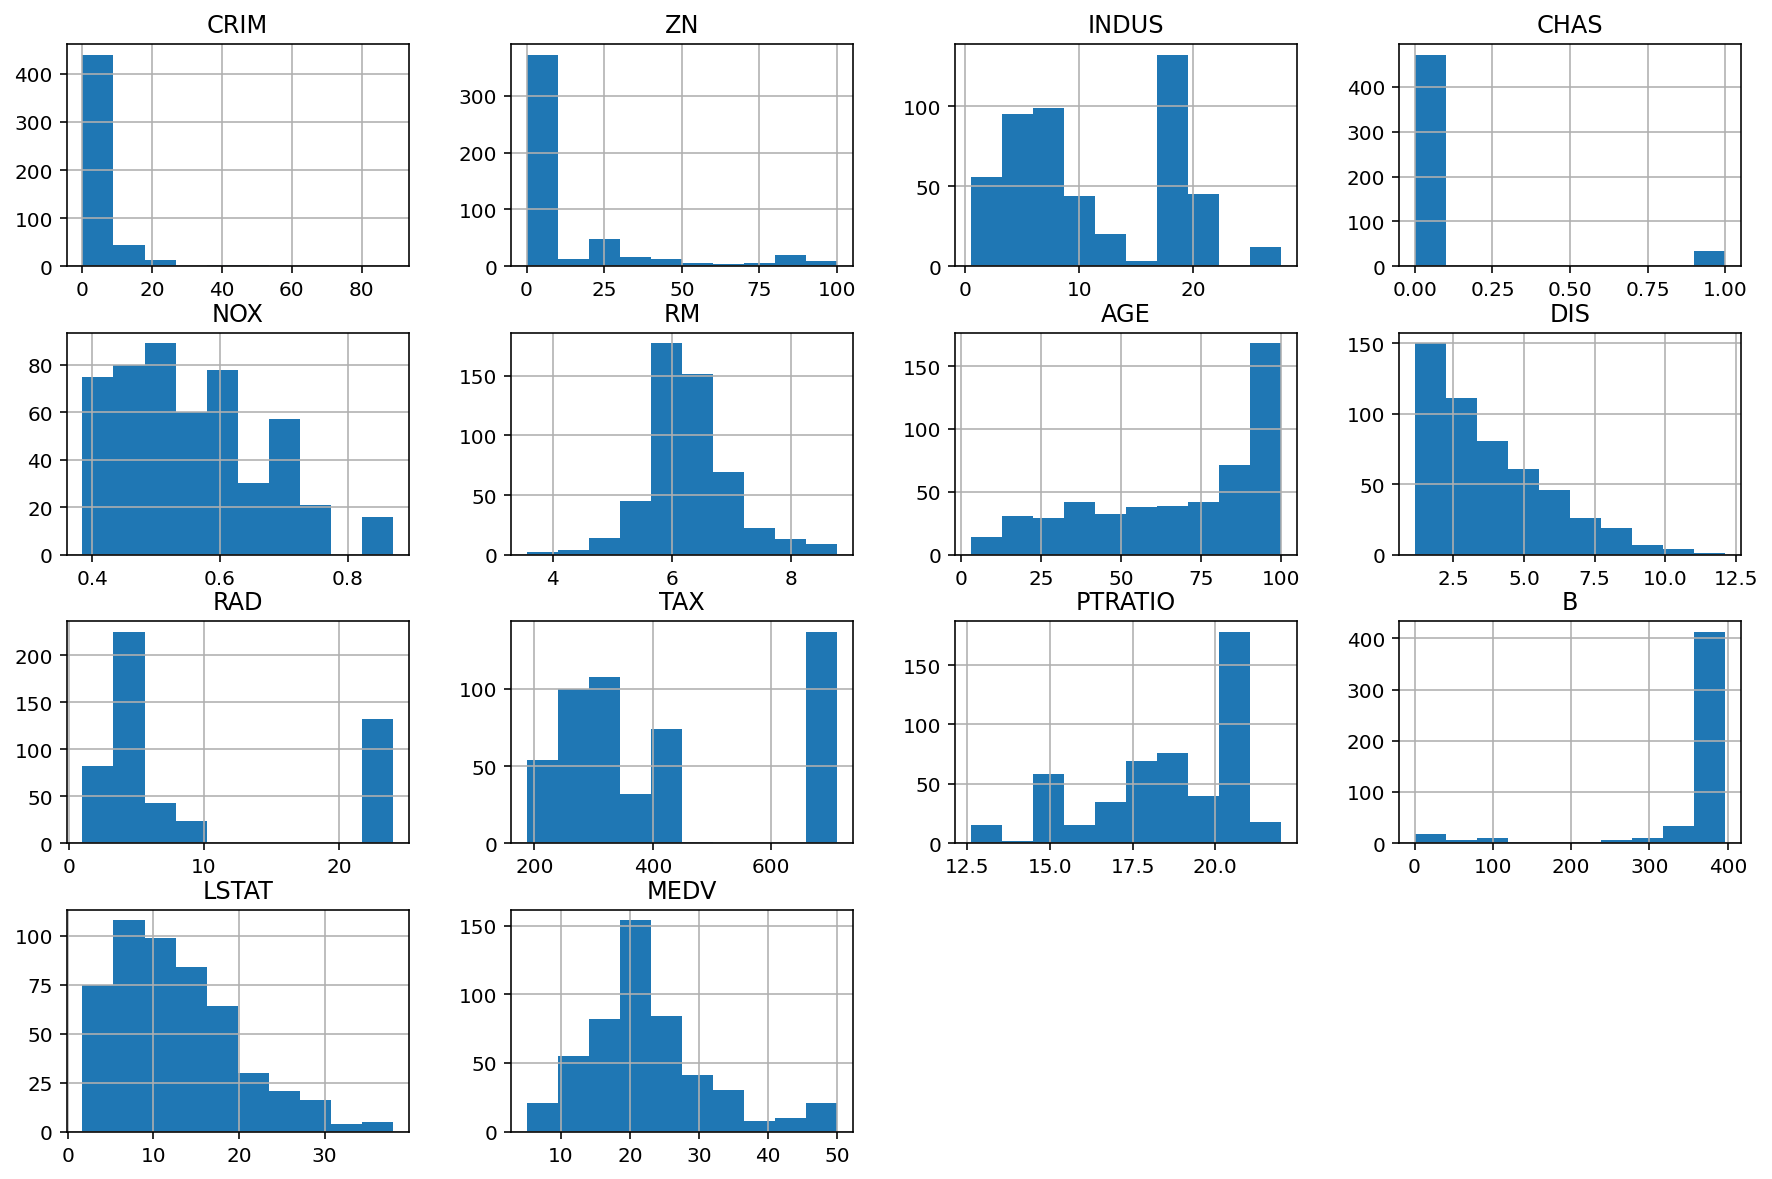

In [5]:
df.hist(figsize=(15, 10));

## **sklearn preprocessing.PowerTransformer()**

In [6]:
from sklearn import preprocessing

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # support only positive value
cols=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False) # support 0, negative and positive values
# cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
mat = pt.fit_transform(df[cols])
mat[:5]

array([[-6.84399123e+00,  1.00873264e+00, -8.34416350e-01,
         2.96056798e+00,  2.01623543e+02,  1.26486975e+00,
         0.00000000e+00,  1.80725765e+00,  3.27453118e+04,
         9.05316298e+08,  1.93825661e+00,  4.57293637e+00],
       [-4.44783349e+00,  3.07396246e+00, -1.09240760e+00,
         2.90565752e+00,  2.60624267e+02,  1.41858500e+00,
         6.60260240e-01,  1.79657673e+00,  6.32534251e+04,
         9.05316298e+08,  2.87698253e+00,  4.36558166e+00],
       [-4.44893609e+00,  3.07396246e+00, -1.09240760e+00,
         3.17138545e+00,  1.84738608e+02,  1.41858500e+00,
         6.60260240e-01,  1.79657673e+00,  6.32534251e+04,
         8.71766316e+08,  1.64038750e+00,  5.33694273e+00],
       [-4.19447041e+00,  9.26595784e-01, -1.14039959e+00,
         3.10784336e+00,  1.25260171e+02,  1.57146011e+00,
         1.01752834e+00,  1.79164525e+00,  7.83922166e+04,
         8.86490580e+08,  1.22239639e+00,  5.25495447e+00],
       [-3.12283788e+00,  9.26595784e-01, -1.1403995

In [9]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_CRIM',
 'bc_INDUS',
 'bc_NOX',
 'bc_RM',
 'bc_AGE',
 'bc_DIS',
 'bc_RAD',
 'bc_TAX',
 'bc_PTRATIO',
 'bc_B',
 'bc_LSTAT',
 'bc_MEDV']

In [10]:
ds=pd.concat([df, pd.DataFrame(mat, columns=bc_cols)], axis='columns')
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,bc_CRIM,bc_INDUS,bc_NOX,bc_RM,bc_AGE,bc_DIS,bc_RAD,bc_TAX,bc_PTRATIO,bc_B,bc_LSTAT,bc_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-6.843991,1.008733,-0.834416,2.960568,201.623543,1.264870,0.000000,1.807258,32745.311816,9.053163e+08,1.938257,4.572936
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-4.447833,3.073962,-1.092408,2.905658,260.624267,1.418585,0.660260,1.796577,63253.425063,9.053163e+08,2.876983,4.365582
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,-4.448936,3.073962,-1.092408,3.171385,184.738608,1.418585,0.660260,1.796577,63253.425063,8.717663e+08,1.640387,5.336943
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,-4.194470,0.926596,-1.140400,3.107843,125.260171,1.571460,1.017528,1.791645,78392.216639,8.864906e+08,1.222396,5.254954
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,-3.122838,0.926596,-1.140400,3.158548,157.195622,1.571460,1.017528,1.791645,78392.216639,9.053163e+08,2.036925,5.428607


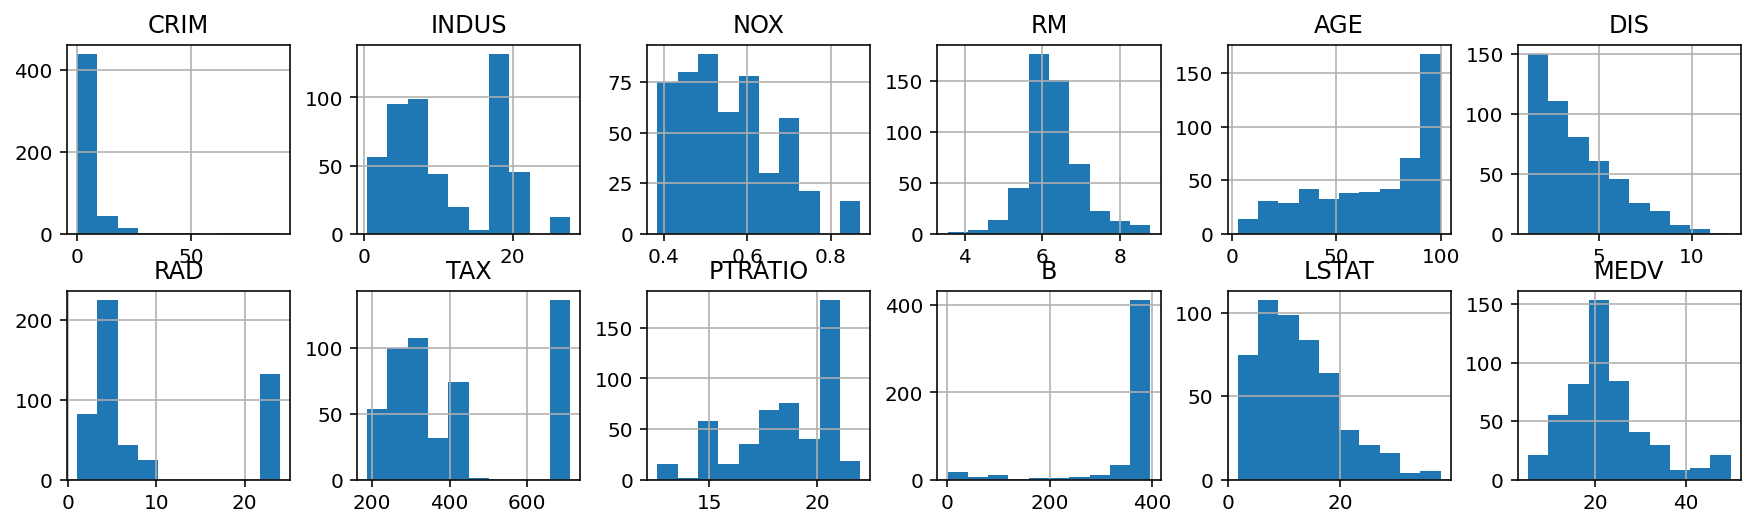

In [11]:
ds[cols].hist(layout=(2, 6), figsize=(15, 4));

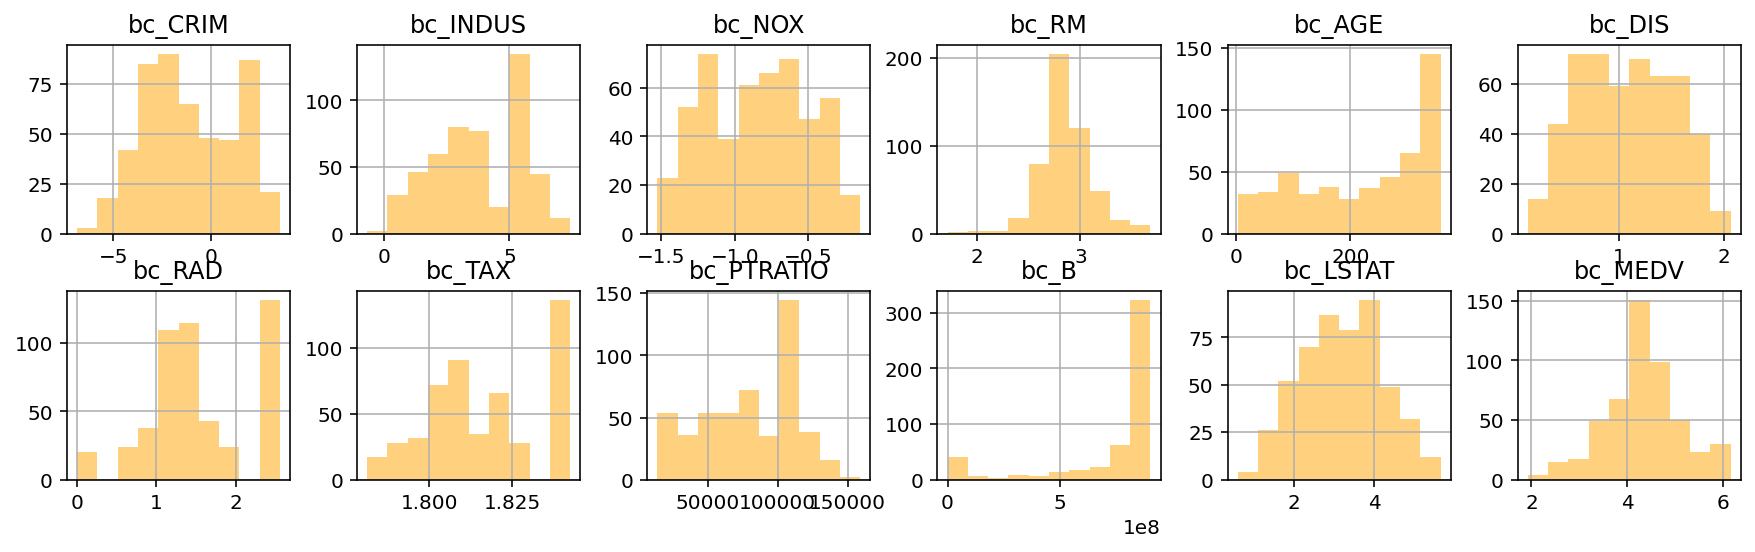

In [13]:
ds[bc_cols].hist(layout=(2, 6), figsize=(15, 4), color='orange', alpha=.5);